## Converting coordinates between projections

This is a follow up to [a question](https://www.linkedin.com/grp/post/3985504-6006363602393530370) from Chris Jackson (Imperial) on LinkedIn. 

Here are the coordinates we have, UTM zone 16, WGS84 datum:

In [1]:
x = 812136.38
y = 10151410.68

Those look like they are in feet. Let's convert them:

In [2]:
x *= 0.3048
y *= 0.3048
x, y

(247539.168624, 3094149.9752640002)

We will use the [`pyproj`](https://pypi.python.org/pypi/pyproj) project. 

In [3]:
import pyproj as pp

Set up the projections using [EPSG codes](http://spatialreference.org/) (we'll define the target projection too while we're at it).

In [4]:
utm15_wgs84 = pp.Proj(init='epsg:32615') 
utm16_wgs84 = pp.Proj(init='epsg:32616')

utm15_nad27 = pp.Proj(init='epsg:26715')
utm16_nad27 = pp.Proj(init='epsg:26716')

Let's just check where we are with a quick map:

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
% matplotlib inline

ImportError: No module named 'mpl_toolkits.basemap'

In [6]:
m = Basemap(width=6000000,height=6000000,projection='lcc',
            resolution='c',
            lat_1=45,
            lat_2=55,
            lat_0=50,
            lon_0=-100.)

# Set up the map. 
m.drawcoastlines()
m.drawmapboundary(fill_color='#aaccee')
m.fillcontinents(color='#aaddaa',lake_color='#aaccee')

lon, lat = utm16_wgs84(x, y, inverse=True)  # To convert to lon, lat
map_x, map_y = m(lon, lat)
m.scatter(map_x, map_y, 12, marker='o', color='red')

plt.show()

NameError: name 'Basemap' is not defined

## Coordinate transformation

Looks reasonable, let's do the transformation...

In [46]:
new_coords = pp.transform(utm16_nad27,  # From
                          utm15_wgs84,  # To
                          x, y)         # Coordinates

In [47]:
new_coords  # These are in metres!

([668289.7894208364, 668389.5137875683, 668489.2381542905],
 [498.66323992501503, 598.3968759964243, 698.1308414315228])

Sanity check with another map:

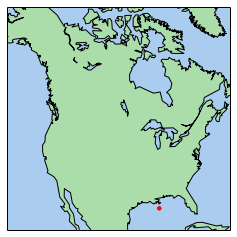

In [9]:
m = Basemap(width=6000000,height=6000000,projection='lcc',
            resolution='c',
            lat_1=45,
            lat_2=55,
            lat_0=50,
            lon_0=-100.)

# Set up the map. 
m.drawcoastlines()
m.drawmapboundary(fill_color='#aaccee')
m.fillcontinents(color='#aaddaa',lake_color='#aaccee')

new_x, new_y = new_coords
new_lon, new_lat = utm15_nad27(new_x, new_y, inverse=True)  # To convert to lon, lat
new_map_x, new_map_y = m(new_lon, new_lat)
m.scatter(new_map_x, new_map_y, 12, marker='o', color='red')

plt.show()

Sweet!

<img src="https://avatars1.githubusercontent.com/u/1692321?v=3&s=200" style="float:right;" width="50px" /><p style="color:gray; float:right;">© 2015 <a href="http://www.agilegeoscience.com/">Agile Geoscience</a> — <a href="https://creativecommons.org/licenses/by/4.0/">CC-BY</a> — Have fun!&nbsp;&nbsp;&nbsp;</p>